In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
img_1=cv2.imread('C:\\Users\\hinaa\\Documents\\ML_Projects\\brain_classification\\Training\\glioma_tumor\\gg (8).jpg ')

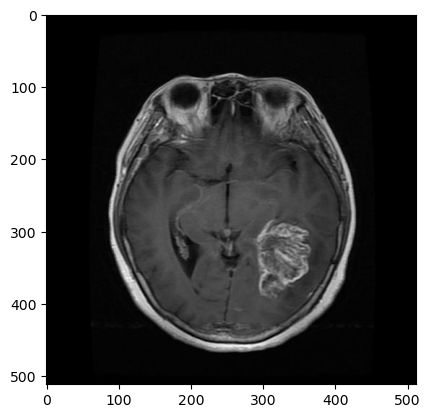

In [3]:
plt.imshow(img_1)

In [4]:
img_2=cv2.imread('C:\\Users\\hinaa\\Documents\\ML_Projects\\brain_classification\\Training\\meningioma_tumor\\m (7).jpg ')

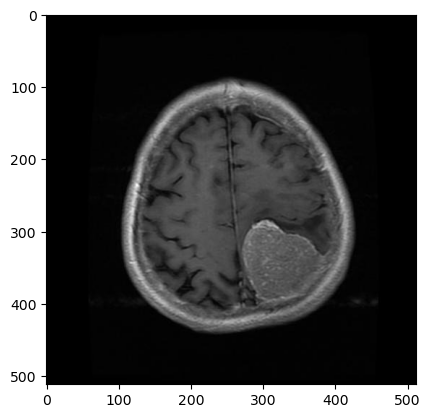

In [5]:
plt.imshow(img_2)

In [6]:
img_3=cv2.imread('C:\\Users\\hinaa\\Documents\\ML_Projects\\brain_classification\\Training\\no_tumor\\image (5).jpg ')

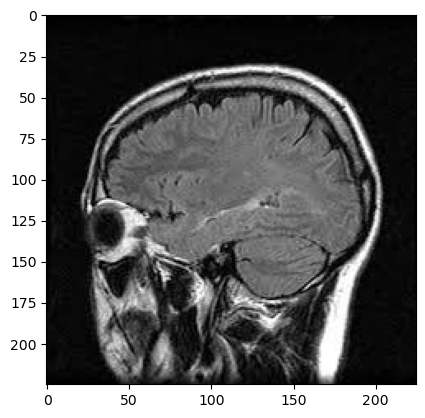

In [7]:
plt.imshow(img_3)

In [8]:
img_4=cv2.imread('C:\\Users\\hinaa\\Documents\\ML_Projects\\brain_classification\\Training\\pituitary_tumor\\p (16).jpg ')

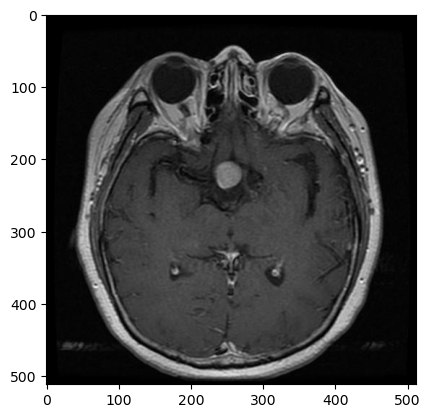

In [9]:
plt.imshow(img_4)

# Image Manipulation

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
image_gen=ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

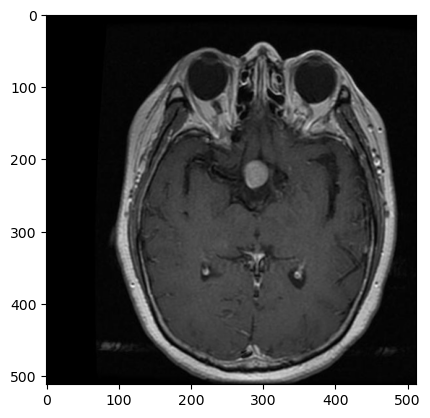

In [12]:
plt.imshow(image_gen.random_transform(img_4))

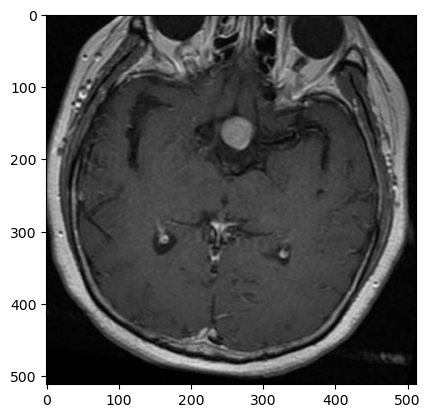

In [13]:
plt.imshow(image_gen.random_transform(img_4))

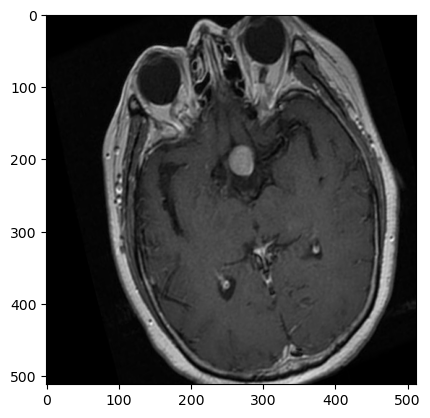

In [14]:
plt.imshow(image_gen.random_transform(img_4))

# Generating many manipulated images from a directory

In [15]:
image_gen.flow_from_directory('C:\\Users\\hinaa\\Documents\\ML_Projects\\brain_classification\\Training')

Found 2870 images belonging to 4 classes.


In [16]:
image_gen.flow_from_directory('C:\\Users\\hinaa\\Documents\\ML_Projects\\brain_classification\\Testing')

Found 394 images belonging to 4 classes.


# Creating Model

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Lambda
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [18]:
# Define directories for train and test data
train_dir = 'C:\\Users\\hinaa\\Documents\\ML_Projects\\brain_classification\\Training'
test_dir = 'C:\\Users\\hinaa\\Documents\\ML_Projects\\brain_classification\\Testing'

In [19]:
# Define image size and batch size
img_width, img_height = 128, 128
batch_size = 32

In [20]:
# Create data generators for train and test data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [21]:

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(img_width, img_height),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')


Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [22]:
input_shape = (128, 128, 3)
num_classes = 4  # Adjust based on the number of classes in your dataset

def create_cnn_model(input_shape, num_classes):
    model = Sequential()

    # Convolutional Layer 1
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Convolutional Layer 2
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Convolutional Layer 3
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Flatten the layers
    model.add(Flatten())

    # Debug Layer to print the shape after Flatten
    def print_shape(x):
        print(f'Flatten output shape: {x.shape}')
        return x

    model.add(Lambda(print_shape))

    # Fully Connected Layer 1
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    # Fully Connected Layer 2
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(num_classes, activation='softmax'))

    return model

In [23]:
# Create the model
model = create_cnn_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\hinaa\Anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Flatten output shape: (None, 25088)
Flatten output shape: (None, 25088)
Flatten output shape: (None, 25088)
Flatten output shape: (None, 25088)
Flatten output shape: (None, 25088)
Flatten output shape: (None, 25088)
Flatten output shape: (None, 25088)
Flatten output shape: (None, 25088)


In [25]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    epochs=80,
)

Epoch 1/80
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 980ms/step - accuracy: 0.4712 - loss: 1.4980Flatten output shape: (None, 25088)
89/89 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.4716 - loss: 1.4967 - val_accuracy: 0.1901 - val_loss: 10.3500
Epoch 2/80
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6250 - loss: 1.2681 - val_accuracy: 0.1000 - val_loss: 11.2479
Epoch 3/80


C:\Users\hinaa\Anaconda3\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


89/89 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.5537 - loss: 1.2228 - val_accuracy: 0.1927 - val_loss: 4.8309
Epoch 4/80
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 894us/step - accuracy: 0.4688 - loss: 1.2285 - val_accuracy: 0.0000e+00 - val_loss: 6.0328
Epoch 5/80
89/89 ━━━━━━━━━━━━━━━━━━━━ 90s 991ms/step - accuracy: 0.6144 - loss: 1.0116 - val_accuracy: 0.1823 - val_loss: 4.6099
Epoch 6/80
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 905us/step - accuracy: 0.5312 - loss: 0.9622 - val_accuracy: 0.4000 - val_loss: 2.8749
Epoch 7/80
89/89 ━━━━━━━━━━━━━━━━━━━━ 90s 997ms/step - accuracy: 0.6434 - loss: 0.9244 - val_accuracy: 0.1927 - val_loss: 3.8926
Epoch 8/80
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 931us/step - accuracy: 0.6250 - loss: 0.7472 - val_accuracy: 0.1000 - val_loss: 4.6425
Epoch 9/80
89/89 ━━━━━━━━━━━━━━━━━━━━ 89s 984ms/step - accuracy: 0.6924 - loss: 0.7975 - val_accuracy: 0.3932 - val_loss: 1.5507
Epoch 10/80
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 849us/step - accuracy: 0.5625 - loss: 1.0891 - val_accuracy: 0.4000 

In [42]:
# Save the model to an HDF5 file
model.save('brain_classification.h5')